In [81]:
import json
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [82]:
# load files
# - lear: lear_slog_sparsity_test_2_train.tsv
# - dear = dear_slog_sparsity_test_1_train.tsv
# each file is one column per line, containing a json object

with open('lear_slog_sparsity_test_4_train.tsv', 'r') as f:
    lear_lines = f.readlines()
with open('dear_slog_sparsity_test_4_train.tsv', 'r') as f:
    dear_lines = f.readlines()

lear_data = [json.loads(line.replace("'",'"')) for line in lear_lines]
dear_data = [json.loads(line.replace("'",'"')) for line in dear_lines]

print(f"LEAR data samples: {len(lear_data)}")
print(f"DEAR data samples: {len(dear_data)}")

LEAR data samples: 325720
DEAR data samples: 325720


In [83]:
# sample a line from each
print("Sample LEAR data:")
print(json.dumps(lear_data[0], indent=2))
print("\nSample DEAR data:")
print(json.dumps(dear_data[0], indent=2))

Sample LEAR data:
{
  "input": "a boy loved a frog in the house",
  "sentence_len": 4,
  "gold": "* house ( x _ 7 ) ; boy ( x _ 1 ) and love . agent ( x _ 2 , x _ 1 ) and love . theme ( x _ 2 , x _ 4 ) and frog ( x _ 4 ) and frog . nmod . in ( x _ 4 , x _ 7 )",
  "output": [
    "love",
    "None",
    "frog",
    "house"
  ],
  "processed_gold": [
    "love",
    "boy",
    "frog",
    "in",
    "house",
    "None"
  ],
  "sample_num": 0,
  "composer_output": [
    [
      [
        4,
        7
      ],
      [
        [
          4,
          4
        ],
        [
          7,
          7
        ]
      ]
    ],
    [
      [
        0,
        3
      ],
      [
        [
          1,
          1
        ],
        [
          2,
          2
        ]
      ]
    ],
    [
      [
        0,
        7
      ],
      [
        [
          0,
          3
        ],
        [
          4,
          7
        ]
      ]
    ]
  ],
  "final_semantic": {
    "children": [
      {
       

In [84]:
# turn data into pandas dataframe for easier analysis
lear_df = pd.DataFrame(lear_data)
dear_df = pd.DataFrame(dear_data)

dear_df

,input,sentence_len,gold,output,processed_gold,sample_num,c_reward,s_reward
0,a boy loved a frog in the house,4,* house ( x _ 7 ) ; boy ( x _ 1 ) and love . a...,"house(love,relcl) house(boy,beside) frog(house...","love(boy,agent) love(frog,theme) frog(house,in)",0,0.285714,0.0
1,a boy loved a frog in the house,4,* house ( x _ 7 ) ; boy ( x _ 1 ) and love . a...,"boy(love,relcl) love(house,recipient) love(fro...","love(boy,agent) love(frog,theme) frog(house,in)",1,0.571429,1.0
2,a boy loved a frog in the house,4,* house ( x _ 7 ) ; boy ( x _ 1 ) and love . a...,"love(frog,agent) love(house,recipient) frog(bo...","love(boy,agent) love(frog,theme) frog(house,in)",2,0.333333,0.0
3,a boy loved a frog in the house,4,* house ( x _ 7 ) ; boy ( x _ 1 ) and love . a...,"frog(boy,in) frog(house,on) frog(love,relcl) l...","love(boy,agent) love(frog,theme) frog(house,in)",3,0.571429,0.5
4,a boy loved a frog in the house,4,* house ( x _ 7 ) ; boy ( x _ 1 ) and love . a...,"boy(frog,in) boy(house,in) boy(love,relcl) lov...","love(boy,agent) love(frog,theme) frog(house,in)",4,0.285714,0.0
...,...,...,...,...,...,...,...,...
325715,the fruit was rolled,2,"* fruit ( x _ 1 ) ; roll . theme ( x _ 3 , x _...","roll(fruit,theme)","roll(fruit,theme)",5,1.000000,1.0
325716,the fruit was rolled,2,"* fruit ( x _ 1 ) ; roll . theme ( x _ 3 , x _...","roll(fruit,theme)","roll(fruit,theme)",6,1.000000,1.0
325717,the fruit was rolled,2,"* fruit ( x _ 1 ) ; roll . theme ( x _ 3 , x _...","roll(fruit,theme)","roll(fruit,theme)",7,1.000000,1.0
325718,the fruit was rolled,2,"* fruit ( x _ 1 ) ; roll . theme ( x _ 3 , x _...","roll(fruit,theme)","roll(fruit,theme)",8,1.000000,1.0


### LeAR: Catalan Number formula:

$$P_\text{LeAR}=\frac{(2n)!}{(n+1)!n!}$$

### DeAR: Exponential
$$P_\text{DeAR}=n^{n-2}$$

In [85]:
def catalan_number(n):
    if n == 0:
        return 1
    return sum(catalan_number(i) * catalan_number(n - 1 - i) for i in range(n))

def calc_pos_lear(n):
    return catalan_number(n-1)

def calc_pos_dear(n):
    return n**(n-2)


pos_lear = {}
pos_dear = {}
# save values 2 to 20
print("Sentence Length | LEAR Pos | DEAR Pos")
for i in range(2, 17):
    pos_lear[i] = calc_pos_lear(i)
    pos_dear[i] = calc_pos_dear(i)
    print(f"{i:15} | {pos_lear[i]:8,} | {pos_dear[i]:24,}")

Sentence Length | LEAR Pos | DEAR Pos
              2 |        1 |                        1
              3 |        2 |                        3
              4 |        5 |                       16
              5 |       14 |                      125
              6 |       42 |                    1,296
              7 |      132 |                   16,807
              8 |      429 |                  262,144
              9 |    1,430 |                4,782,969
             10 |    4,862 |              100,000,000
             11 |   16,796 |            2,357,947,691
             12 |   58,786 |           61,917,364,224
             13 |  208,012 |        1,792,160,394,037
             14 |  742,900 |       56,693,912,375,296
             15 | 2,674,440 |    1,946,195,068,359,375
             16 | 9,694,845 |   72,057,594,037,927,936


In [86]:
lear_df['final_semantic'][0]

{'children': [{'children': [],
   'token': 'boy',
   'rel': 'recipient',
   'class': 'E'},
  {'children': [], 'token': 'frog', 'rel': 'theme', 'class': 'E'},
  {'children': [], 'token': 'house', 'rel': 'recipient', 'class': 'E'}],
 'token': 'love',
 'rel': '',
 'class': 'P'}

In [87]:
# Take process_gold method from DeAR

def process_gold(s):
    # Examples:
    # * cake ( x _ 8 ) ; cat ( x _ 1 ) AND cat . nmod ( x _ 1 , x _ 3 ) AND admire . agent ( x _ 3 , x _ 1 ) AND admire . ccomp ( x _ 3 , x _ 6 ) AND eat . agent ( x _ 6 , Emily ) AND eat . theme ( x _ 6 , x _ 8 )
    # * muffin ( x _ 4 ) ; * painting ( x _ 7 ) ; * girl ( x _ 10 ) ; mail . recipient ( x _ 2 , Emma ) AND mail . theme ( x _ 2 , x _ 4 ) AND mail . agent ( x _ 2 , x _ 10 ) AND muffin . nmod . beside ( x _ 4 , x _ 7 )

    # each edge will be a triplet of form (hed, dep, rel_name)
    # a predicate -> entity relation will look like (8, 1, "agent") (agent, theme, recipient)
    # a predicate -> predicate relation will look like (8, 6, "ccomp") (ccomp, xcomp)
    # an entity -> predicate relation will look like (1, 3, "relcl")
    # an entity -> entity relation will look like (1, 3, "in") (in, on, beside)
    edges = []
    variable_map = {}
    
    elements = s.replace(" and ", ";").split(";")
    for element in elements:
        # if there is an nmod, it can either be an nmod (if there is a preposition) or a relcl (if there is no preposition)
        # check for nmod first
        if ". nmod ." in element:
            # cake.nmod.on.x_4.x_7
            nmod = element.replace(" ", "").replace("(",".").replace(")","").replace(",",".")
            nmod = nmod.split(".")
            variable_map[nmod[3]] = nmod[0]
            nmod = nmod[-3:]
            # [on, x_4, x_7]
            nmod = [nmod[1], nmod[2], nmod[0]]
            nmod = [el.replace("x_", "") for el in nmod]
            # [4, 7, on]
            edges.append(nmod)

        # next, relcl
        elif ". nmod" in element:
            # cake.nmod.x_4.x_7
            relcl = element.replace(" ", "").replace("(",".").replace(")","").replace(",",".")
            relcl = relcl.split(".")
            variable_map[relcl[2]] = relcl[0]
            relcl = relcl[-2:]
            # [x_4, x_7]
            relcl = [el.replace("x_", "") for el in relcl] + ["relcl"]
            # [4, 7, relcl]
            edges.append(relcl)

        # else, if there is a comma, it is a predicate
        elif ',' in element:
            # study . agent ( x _ 2 , x _ 1 )
            predicate = element.replace(" ", "").replace("(",".").replace(")","").replace(",",".")
            # study.agent.x_2.x_1
            predicate = predicate.split(".")
            variable_map[predicate[2]] = predicate[0]
            predicate = predicate[-3:]
            # [agent, x_2, x_1]
            predicate = [predicate[1], predicate[2], predicate[0]]
            # [x_2, x_1, agent]
            predicate = [el.replace("x_", "") for el in predicate]
            # [2, 1, agent]
            edges.append(predicate)
            
        # if there is no comma, it is an entity, which we capture in variable_map
        else:
            # cake ( x _ 8 ) or * cake ( x _ 8 )
            element = element.replace(" ", "").replace("(",".").replace(")","").replace("*", "")
            # cake.x_8
            element = element.split(".")
            variable_map[element[1]] = element[0]

    # Now we go through the edges and replace the entities with their corresponding variables
    for i in range(len(edges)):
        for j in range(2):
            if edges[i][j].isnumeric():
                assert "x_" + edges[i][j] in variable_map, f"Entity {edges[i][j]} not found in variable_map: {variable_map}"
                edges[i][j] = variable_map["x_" + edges[i][j]]

    debug_info = {
        "elements": elements,
        "variable_map": variable_map
    }
    return edges#, debug_info

# and create a new field in both dear_df and lear_df that processed the 'gold' field
lear_df['processed_gold'] = lear_df['gold'].apply(process_gold)
dear_df['processed_gold'] = dear_df['gold'].apply(process_gold)

In [88]:
dear_df['processed_gold'][0]

[['love', 'boy', 'agent'], ['love', 'frog', 'theme'], ['frog', 'house', 'in']]

In [89]:
lear_df['final_semantic'][0]

{'children': [{'children': [],
   'token': 'boy',
   'rel': 'recipient',
   'class': 'E'},
  {'children': [], 'token': 'frog', 'rel': 'theme', 'class': 'E'},
  {'children': [], 'token': 'house', 'rel': 'recipient', 'class': 'E'}],
 'token': 'love',
 'rel': '',
 'class': 'P'}

In [90]:
def process_lear_semantic(sem_json):
    """Process a json string representing the final_semantic field in LEAR data.
    Each object in the json has the attributes 'class', 'rel', 'token', and 'children'. Children is a list of similar objects.
    We want to extract edges of the form (head, dependent, relation) from this tree structure.
    """
    edges = []

    def extract_edges(node):
        if 'children' in node:
            for child in node['children']:
                edges.append((node['token'], child['token'], child['rel']))
                extract_edges(child)

    extract_edges(sem_json)

    return edges

# now we use the newly created process_lear_semantic function to create a new field in lear_df
lear_df['processed_lear_semantic'] = lear_df['final_semantic'].apply(process_lear_semantic)
lear_df['processed_lear_semantic'][0]

[('love', 'boy', 'recipient'),
 ('love', 'frog', 'theme'),
 ('love', 'house', 'recipient')]

In [91]:
# now we use the newly processed semantic to calculate a reward
def get_reward(pred_edges, gold_edges):
    # flatten into strings for easy set ops
    gold_unlab = {f"{h}|{d}" for h, d, _ in gold_edges}
    pred_unlab = {f"{h}|{d}" for h, d, _ in pred_edges}
    gold_lab = {f"{h}|{d}|{r}" for h, d, r in gold_edges}
    pred_lab = {f"{h}|{d}|{r}" for h, d, r in pred_edges}

    # For composer: precision, recall, and F1 over unlabelled edges
    correct_unlab = pred_unlab & gold_unlab
    prec = len(correct_unlab) / len(pred_unlab) if pred_unlab else 0
    rec = len(correct_unlab) / len(gold_unlab) if gold_unlab else 0
    comp_f1 = 2 * prec * rec / (prec + rec) if (prec + rec) else 0

    # For solver: accuracy of labels *on correctly predicted edges only*
    correct_lab = pred_lab & gold_lab
    solv_reward = len(correct_lab) / len(correct_unlab) if correct_unlab else 0

    return comp_f1, solv_reward

lear_df['c_reward'], lear_df['s_reward'] = zip(*lear_df.apply(lambda row: get_reward(row['processed_lear_semantic'], row['processed_gold']), axis=1))

lear_df.head()

,input,sentence_len,gold,output,processed_gold,sample_num,composer_output,final_semantic,c_reward,s_reward,processed_lear_semantic
0,a boy loved a frog in the house,4,* house ( x _ 7 ) ; boy ( x _ 1 ) and love . a...,"[love, None, frog, house]","[[love, boy, agent], [love, frog, theme], [fro...",0,"[[[4, 7], [[4, 4], [7, 7]]], [[0, 3], [[1, 1],...","{'children': [{'children': [], 'token': 'boy',...",0.666667,0.500000,"[(love, boy, recipient), (love, frog, theme), ..."
1,a boy loved a frog in the house,4,* house ( x _ 7 ) ; boy ( x _ 1 ) and love . a...,"[love, frog, beside, house, boy, None]","[[love, boy, agent], [love, frog, theme], [fro...",1,"[[[0, 2], [[1, 1], [2, 2]]], [[3, 7], [[4, 4],...","{'children': [{'children': [], 'token': 'boy',...",1.000000,0.000000,"[(love, boy, theme), (love, frog, agent), (fro..."
2,a boy loved a frog in the house,4,* house ( x _ 7 ) ; boy ( x _ 1 ) and love . a...,"[love, None, frog, in, house, boy]","[[love, boy, agent], [love, frog, theme], [fro...",2,"[[[1, 2], [[1, 1], [2, 2]]], [[4, 7], [[4, 4],...","{'children': [{'children': [], 'token': 'boy',...",1.000000,0.666667,"[(love, boy, recipient), (love, frog, theme), ..."
3,a boy loved a frog in the house,4,* house ( x _ 7 ) ; boy ( x _ 1 ) and love . a...,"[love, None, frog, in, house, boy]","[[love, boy, agent], [love, frog, theme], [fro...",3,"[[[3, 7], [[4, 4], [7, 7]]], [[0, 2], [[1, 1],...","{'children': [{'children': [], 'token': 'boy',...",1.000000,0.666667,"[(love, boy, recipient), (love, frog, theme), ..."
4,a boy loved a frog in the house,4,* house ( x _ 7 ) ; boy ( x _ 1 ) and love . a...,"[love, house, boy, frog]","[[love, boy, agent], [love, frog, theme], [fro...",4,"[[[0, 2], [[1, 1], [2, 2]]], [[0, 4], [[0, 2],...","{'children': [{'children': [], 'token': 'boy',...",0.666667,0.000000,"[(love, boy, theme), (love, frog, recipient), ..."


In [92]:
dear_df['possible_trees'] = dear_df['sentence_len'].apply(lambda n: pos_dear[n] if n in pos_dear else None)
lear_df['possible_trees'] = lear_df['sentence_len'].apply(lambda n: pos_lear[n] if n in pos_lear else None)
lear_df.head()

,input,sentence_len,gold,output,processed_gold,sample_num,composer_output,final_semantic,c_reward,s_reward,processed_lear_semantic,possible_trees
0,a boy loved a frog in the house,4,* house ( x _ 7 ) ; boy ( x _ 1 ) and love . a...,"[love, None, frog, house]","[[love, boy, agent], [love, frog, theme], [fro...",0,"[[[4, 7], [[4, 4], [7, 7]]], [[0, 3], [[1, 1],...","{'children': [{'children': [], 'token': 'boy',...",0.666667,0.500000,"[(love, boy, recipient), (love, frog, theme), ...",5
1,a boy loved a frog in the house,4,* house ( x _ 7 ) ; boy ( x _ 1 ) and love . a...,"[love, frog, beside, house, boy, None]","[[love, boy, agent], [love, frog, theme], [fro...",1,"[[[0, 2], [[1, 1], [2, 2]]], [[3, 7], [[4, 4],...","{'children': [{'children': [], 'token': 'boy',...",1.000000,0.000000,"[(love, boy, theme), (love, frog, agent), (fro...",5
2,a boy loved a frog in the house,4,* house ( x _ 7 ) ; boy ( x _ 1 ) and love . a...,"[love, None, frog, in, house, boy]","[[love, boy, agent], [love, frog, theme], [fro...",2,"[[[1, 2], [[1, 1], [2, 2]]], [[4, 7], [[4, 4],...","{'children': [{'children': [], 'token': 'boy',...",1.000000,0.666667,"[(love, boy, recipient), (love, frog, theme), ...",5
3,a boy loved a frog in the house,4,* house ( x _ 7 ) ; boy ( x _ 1 ) and love . a...,"[love, None, frog, in, house, boy]","[[love, boy, agent], [love, frog, theme], [fro...",3,"[[[3, 7], [[4, 4], [7, 7]]], [[0, 2], [[1, 1],...","{'children': [{'children': [], 'token': 'boy',...",1.000000,0.666667,"[(love, boy, recipient), (love, frog, theme), ...",5
4,a boy loved a frog in the house,4,* house ( x _ 7 ) ; boy ( x _ 1 ) and love . a...,"[love, house, boy, frog]","[[love, boy, agent], [love, frog, theme], [fro...",4,"[[[0, 2], [[1, 1], [2, 2]]], [[0, 4], [[0, 2],...","{'children': [{'children': [], 'token': 'boy',...",0.666667,0.000000,"[(love, boy, theme), (love, frog, recipient), ...",5


In [93]:
lear_df.tail()

,input,sentence_len,gold,output,processed_gold,sample_num,composer_output,final_semantic,c_reward,s_reward,processed_lear_semantic,possible_trees
325715,the fruit was rolled,2,"* fruit ( x _ 1 ) ; roll . theme ( x _ 3 , x _...","[roll, None, fruit, None]","[[roll, fruit, theme]]",5,"[[[0, 3], [[1, 1], [3, 3]]]]","{'children': [{'children': [], 'token': 'fruit...",1.0,1.0,"[(roll, fruit, theme)]",1
325716,the fruit was rolled,2,"* fruit ( x _ 1 ) ; roll . theme ( x _ 3 , x _...","[roll, None, fruit, None]","[[roll, fruit, theme]]",6,"[[[0, 3], [[1, 1], [3, 3]]]]","{'children': [{'children': [], 'token': 'fruit...",1.0,1.0,"[(roll, fruit, theme)]",1
325717,the fruit was rolled,2,"* fruit ( x _ 1 ) ; roll . theme ( x _ 3 , x _...","[roll, None, fruit, None]","[[roll, fruit, theme]]",7,"[[[1, 3], [[1, 1], [3, 3]]]]","{'children': [{'children': [], 'token': 'fruit...",1.0,1.0,"[(roll, fruit, theme)]",1
325718,the fruit was rolled,2,"* fruit ( x _ 1 ) ; roll . theme ( x _ 3 , x _...","[roll, None, fruit, None]","[[roll, fruit, theme]]",8,"[[[1, 3], [[1, 1], [3, 3]]]]","{'children': [{'children': [], 'token': 'fruit...",1.0,1.0,"[(roll, fruit, theme)]",1
325719,the fruit was rolled,2,"* fruit ( x _ 1 ) ; roll . theme ( x _ 3 , x _...","[roll, None, fruit, None]","[[roll, fruit, theme]]",9,"[[[0, 3], [[1, 1], [3, 3]]]]","{'children': [{'children': [], 'token': 'fruit...",1.0,1.0,"[(roll, fruit, theme)]",1


In [94]:

def anon_dear_output(s):
    # outputs look like: 'observe(rose,theme) rose(emma,on)'
    # we need: observe(rose) rose(emma)
    edges = s.replace('(',',').replace(')','').split(' ')
    edges = [edge.split(',') for edge in edges]
    edges = [f"{edge[0]}({edge[1]})" for edge in edges]
    return ' '.join(edges)

#test

dear_df['anon_output'] = dear_df['output'].apply(anon_dear_output)

In [95]:
def anon_lear_output(s):
    # outputs look like: [(admire, dog, agent), (admire, melon, recipie...	
    # we need '(admire, dog) (admire, melon)...'
    arr = [f"({h}, {d})" for h, d, r in s]
    return ' '.join(sorted(arr))

lear_df['anon_output'] = lear_df['processed_lear_semantic'].apply(anon_lear_output)
lear_df.tail()

,input,sentence_len,gold,output,processed_gold,sample_num,composer_output,final_semantic,c_reward,s_reward,processed_lear_semantic,possible_trees,anon_output
325715,the fruit was rolled,2,"* fruit ( x _ 1 ) ; roll . theme ( x _ 3 , x _...","[roll, None, fruit, None]","[[roll, fruit, theme]]",5,"[[[0, 3], [[1, 1], [3, 3]]]]","{'children': [{'children': [], 'token': 'fruit...",1.0,1.0,"[(roll, fruit, theme)]",1,"(roll, fruit)"
325716,the fruit was rolled,2,"* fruit ( x _ 1 ) ; roll . theme ( x _ 3 , x _...","[roll, None, fruit, None]","[[roll, fruit, theme]]",6,"[[[0, 3], [[1, 1], [3, 3]]]]","{'children': [{'children': [], 'token': 'fruit...",1.0,1.0,"[(roll, fruit, theme)]",1,"(roll, fruit)"
325717,the fruit was rolled,2,"* fruit ( x _ 1 ) ; roll . theme ( x _ 3 , x _...","[roll, None, fruit, None]","[[roll, fruit, theme]]",7,"[[[1, 3], [[1, 1], [3, 3]]]]","{'children': [{'children': [], 'token': 'fruit...",1.0,1.0,"[(roll, fruit, theme)]",1,"(roll, fruit)"
325718,the fruit was rolled,2,"* fruit ( x _ 1 ) ; roll . theme ( x _ 3 , x _...","[roll, None, fruit, None]","[[roll, fruit, theme]]",8,"[[[1, 3], [[1, 1], [3, 3]]]]","{'children': [{'children': [], 'token': 'fruit...",1.0,1.0,"[(roll, fruit, theme)]",1,"(roll, fruit)"
325719,the fruit was rolled,2,"* fruit ( x _ 1 ) ; roll . theme ( x _ 3 , x _...","[roll, None, fruit, None]","[[roll, fruit, theme]]",9,"[[[0, 3], [[1, 1], [3, 3]]]]","{'children': [{'children': [], 'token': 'fruit...",1.0,1.0,"[(roll, fruit, theme)]",1,"(roll, fruit)"


In [96]:
dear_df[dear_df['sentence_len'] == 11]

,input,sentence_len,gold,output,processed_gold,sample_num,c_reward,s_reward,possible_trees,anon_output
1700,william burned a donut that a friend that a bo...,11,"* lamb ( x _ 12 ) ; burn . agent ( x _ 1 , wil...","boy(burn,relcl) burn(lamb,theme) friend(improv...","[[burn, william, agent], [burn, donut, theme],...",0,0.148148,1.000000,2357947691,boy(burn) burn(lamb) friend(improve) harper(bo...
1701,william burned a donut that a friend that a bo...,11,"* lamb ( x _ 12 ) ; burn . agent ( x _ 1 , wil...","boy(harper,on) burn(william,agent) touch(boy,a...","[[burn, william, agent], [burn, donut, theme],...",1,0.230769,1.000000,2357947691,boy(harper) burn(william) touch(boy) burn(frie...
1702,william burned a donut that a friend that a bo...,11,"* lamb ( x _ 12 ) ; burn . agent ( x _ 1 , wil...","float(like,xcomp) burn(float,ccomp) float(frie...","[[burn, william, agent], [burn, donut, theme],...",2,0.153846,0.500000,2357947691,float(like) burn(float) float(friend) boy(harp...
1703,william burned a donut that a friend that a bo...,11,"* lamb ( x _ 12 ) ; burn . agent ( x _ 1 , wil...","improve(donut,theme) william(friend,on) float(...","[[burn, william, agent], [burn, donut, theme],...",3,0.275862,0.750000,2357947691,improve(donut) william(friend) float(improve) ...
1704,william burned a donut that a friend that a bo...,11,"* lamb ( x _ 12 ) ; burn . agent ( x _ 1 , wil...","like(boy,agent) william(touch,relcl) burn(frie...","[[burn, william, agent], [burn, donut, theme],...",4,0.275862,0.750000,2357947691,like(boy) william(touch) burn(friend) improve(...
...,...,...,...,...,...,...,...,...,...,...
325405,olivia slid a cake that the monkey that a chil...,11,* monkey ( x _ 6 ) ; * bear ( x _ 12 ) ; * cat...,"freeze(cat,theme) bear(freeze,relcl) inflate(b...","[[slide, olivia, agent], [slide, cake, theme],...",5,0.785714,0.636364,2357947691,freeze(cat) bear(freeze) inflate(bear) child(i...
325406,olivia slid a cake that the monkey that a chil...,11,* monkey ( x _ 6 ) ; * bear ( x _ 12 ) ; * cat...,"freeze(cat,theme) bear(freeze,relcl) inflate(b...","[[slide, olivia, agent], [slide, cake, theme],...",6,1.000000,0.857143,2357947691,freeze(cat) bear(freeze) inflate(bear) child(i...
325407,olivia slid a cake that the monkey that a chil...,11,* monkey ( x _ 6 ) ; * bear ( x _ 12 ) ; * cat...,"freeze(cat,theme) bear(freeze,relcl) child(bea...","[[slide, olivia, agent], [slide, cake, theme],...",7,0.500000,0.571429,2357947691,freeze(cat) bear(freeze) child(bear) inflate(c...
325408,olivia slid a cake that the monkey that a chil...,11,* monkey ( x _ 6 ) ; * bear ( x _ 12 ) ; * cat...,"freeze(cat,theme) bear(freeze,relcl) inflate(b...","[[slide, olivia, agent], [slide, cake, theme],...",8,0.814815,0.636364,2357947691,freeze(cat) bear(freeze) inflate(bear) child(i...


In [173]:
# each value of column "input" has 10 rows, corresponding to each of the monte carlo samples.


# Add a group index to preserve original order
lear_df['group_idx'] = lear_df.groupby('input', sort=True).ngroup()
dear_df['group_idx'] = dear_df.groupby('input', sort=True).ngroup()
lear_avg = lear_df.groupby('input', sort=False).agg({
    'c_reward': ['mean', 'max', 'min'],
    's_reward': 'mean',
    'sentence_len': 'first',
    'possible_trees': 'first',
    'group_idx': 'first'
}).reset_index()
lear_avg.columns = ['input', 'c_reward', 'c_reward_max', 'c_reward_min', 's_reward', 'sentence_len', 'possible_trees', 'group_idx']

dear_avg = dear_df.groupby('input', sort=False).agg({
    'c_reward': ['mean', 'max', 'min'],
    's_reward': 'mean',
    'sentence_len': 'first',
    'possible_trees': 'first',
    'group_idx': 'first'
}).reset_index()
dear_avg.columns = ['input', 'c_reward', 'c_reward_max', 'c_reward_min', 's_reward', 'sentence_len', 'possible_trees', 'group_idx']

# add a row_num column to each
lear_avg['row_num'] = range(len(lear_avg))
dear_avg['row_num'] = range(len(dear_avg))

# Add "sparsity" field: proportion of c_rewards == 0 for each input group

def calc_sparsity(group):
    return (group['c_reward'] == 0.0).sum() / len(group)

lear_sparsity = lear_df.groupby('input').apply(calc_sparsity).reset_index(name='sparsity')
dear_sparsity = dear_df.groupby('input').apply(calc_sparsity).reset_index(name='sparsity')

# Merge sparsity into avg dataframes
lear_avg = pd.merge(lear_avg, lear_sparsity, on='input')
dear_avg = pd.merge(dear_avg, dear_sparsity, on='input')

# 2) compute unique tree counts per input
lear_diversity = (lear_df
                  .groupby('input')['anon_output']
                  .nunique()
                  .reset_index(name='trees_explored'))

# (fix possible typo in your original code — you used anon_output for dear)
dear_diversity = (dear_df
                  .groupby('input')['anon_output']
                  .nunique()
                  .reset_index(name='trees_explored'))


# compute "perfect_reward" field, 1 if all 10 samples have c_reward == 1, else 0
lear_avg['perfect_reward'] = (lear_avg['c_reward_min'] == 1.0).astype(int)
dear_avg['perfect_reward'] = (dear_avg['c_reward_min'] == 1.0).astype(int)

# optional: fraction of samples that are unique (out of 10)
lear_diversity['diversity'] = lear_diversity['trees_explored'] / 10
dear_diversity['diversity'] = dear_diversity['trees_explored'] / 10

# 3) merge WITH lear_avg (do NOT divide series from different frames by position)
lear_avg = pd.merge(lear_avg, lear_diversity, on='input', how='left')
dear_avg = pd.merge(dear_avg, dear_diversity, on='input', how='left')

# 4) compute proportion relative to possible_trees, guard divide-by-zero
lear_avg['prop'] = lear_avg['trees_explored'] / lear_avg['possible_trees'].replace({0: np.nan})
dear_avg['prop'] = dear_avg['trees_explored'] / dear_avg['possible_trees'].replace({0: np.nan})

lear_avg

C:\Users\joaqu\AppData\Local\Temp\ipykernel_22208\2782791619.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  lear_sparsity = lear_df.groupby('input').apply(calc_sparsity).reset_index(name='sparsity')
C:\Users\joaqu\AppData\Local\Temp\ipykernel_22208\2782791619.py:35: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dear_sparsity = dear_df.groupby('input').apply(calc_sparsity).reset_index(name='sparsity')


,input,c_reward,c_reward_max,c_reward_min,s_reward,sentence_len,possible_trees,group_idx,row_num,sparsity,perfect_reward,trees_explored,diversity,prop
0,a boy loved a frog in the house,0.766667,1.000000,0.666667,0.333333,4,5,1287,0,0.0,0,2,0.2,0.400000
1,camila gave emma a balloon that was touched,0.622222,0.666667,0.444444,0.400000,5,14,10973,1,0.0,0,3,0.3,0.214286
2,a cake was slid by the landlord,1.000000,1.000000,1.000000,0.400000,3,2,2573,2,0.0,1,1,0.1,0.500000
3,the mouse rented olivia the cake in the backpa...,0.538868,0.769231,0.333333,0.311667,8,429,27863,3,0.0,0,10,1.0,0.023310
4,a hamburger was loaned to a baby,1.000000,1.000000,1.000000,0.450000,3,2,6992,4,0.0,1,1,0.1,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32567,the cake was given to a governor by isabella,1.000000,1.000000,1.000000,1.000000,4,5,22065,32567,0.0,1,1,0.1,0.200000
32568,a baby appreciated that the girl sold emma the...,0.769231,0.769231,0.769231,1.000000,7,132,0,32568,0.0,0,2,0.2,0.015152
32569,a doll was observed by the turkey,1.000000,1.000000,1.000000,1.000000,3,2,4363,32569,0.0,1,1,0.1,0.500000
32570,a radio was valued by a girl,1.000000,1.000000,1.000000,0.950000,3,2,8632,32570,0.0,1,1,0.1,0.500000


In [203]:
# calculate accuracy as when both c_reward and s_reward are 1
dear_avg['accuracy'] = ((dear_avg['c_reward'] == 1) & (dear_avg['s_reward'] == 1)).astype(int)
lear_avg['accuracy'] = ((lear_avg['c_reward'] == 1) & (lear_avg['s_reward'] == 1)).astype(int)

# print some statistics
print(f"DeAR accuracy Mean: {dear_avg['accuracy'].mean()}")
print(f"DeAR accuracy std: {dear_avg['accuracy'].std()}")
print(f"LEAR accuracy Mean: {lear_avg['accuracy'].mean()}")
print(f"LEAR accuracy std: {lear_avg['accuracy'].std()}")

DeAR accuracy Mean: 0.5874370625076754
DeAR accuracy std: 0.4923029564346056
LEAR accuracy Mean: 0.5132629252118384
LEAR accuracy std: 0.49983173664118885


In [98]:
dear_avg['sentence_len'].value_counts().sort_index()

sentence_len
2      4058
3     11902
4      7447
5      5455
6      1938
7      1035
8       316
9        57
10       95
11      232
12       27
13       10
Name: count, dtype: int64

In [ ]:
# print proportion of sentences with sentence_len 2 to 6
dear_prop = (dear_avg['sentence_len'].between(2, 6).mean())
print(f"DeAR proportion: {dear_prop}")


DeAR proportion: 0.9455974456588481


In [99]:
# whenever prop > 1, set to 1, and set trees_explored to possible_trees
dear_avg.loc[dear_avg['prop'] > 1, 'prop'] = 1
dear_avg.loc[dear_avg['prop'] > 1, 'trees_explored'] = dear_avg['possible_trees']
dear_avg[dear_avg['prop'] > 1]

,input,c_reward,c_reward_max,c_reward_min,s_reward,sentence_len,possible_trees,group_idx,row_num,sparsity,trees_explored,diversity,prop


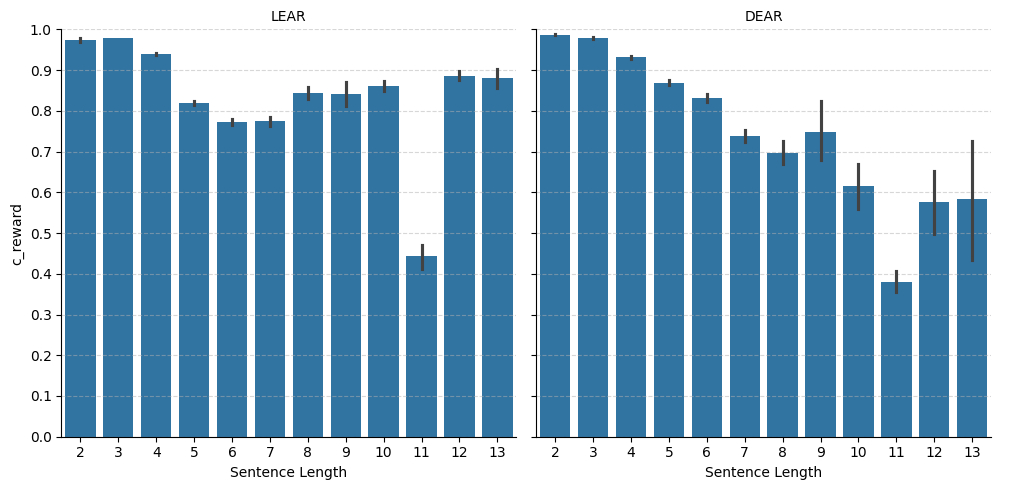

In [309]:
# Create long-form DataFrame
lear_long = lear_avg[['sentence_len', 'c_reward']].copy()
lear_long['method'] = 'LEAR'
dear_long = dear_avg[['sentence_len', 'c_reward']].copy()
dear_long['method'] = 'DEAR'
df = pd.concat([lear_long, dear_long], ignore_index=True)

g = sns.catplot(
    data=df,
    x='sentence_len',
    y='c_reward',
    col='method',
    kind='bar',
)

g.set_axis_labels("Sentence Length", "c_reward")
g.set_titles("{col_name}")
for ax in g.axes.flat:
    ax.set_ylim(0, 1)
    ax.set_yticks([n*0.1 for n in range(11)])
    ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()





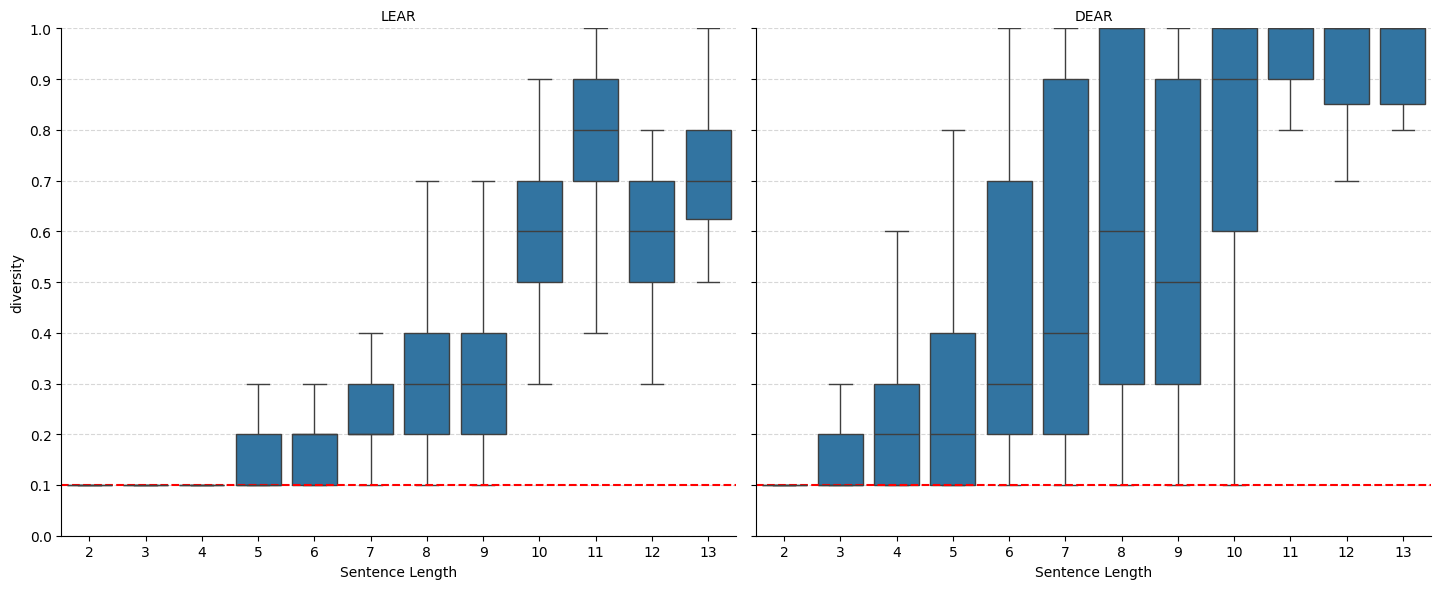

In [101]:
# Create long-form DataFrame
lear_long = lear_avg[['sentence_len', 'diversity']].copy()
lear_long['method'] = 'LEAR'
dear_long = dear_avg[['sentence_len', 'diversity']].copy()
dear_long['method'] = 'DEAR'
df = pd.concat([lear_long, dear_long], ignore_index=True)

g = sns.catplot(
    data=df,
    x='sentence_len',
    y='diversity',
    col='method',
    kind='box',
    showcaps=True,
    showfliers=False,
    height=6,
    aspect=1.2
)


g.set_axis_labels("Sentence Length", "diversity")
g.set_titles("{col_name}")
for ax in g.axes.flat:
    ax.set_ylim(0, 1)
    # create horizontal line at 1/10
    ax.axhline(1/10, color='red', linestyle='--', label='1/10')
    ax.set_yticks([n*0.1 for n in range(11)])
    ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()





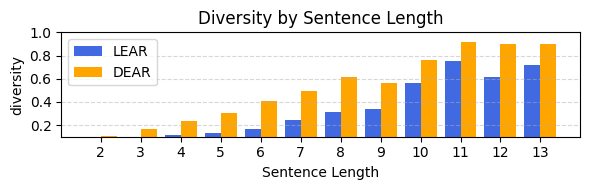

In [308]:
# Overlap the two bar graphs: LEAR in blue, DEAR in orange

import matplotlib.pyplot as plt

# Prepare data
lear_bar = lear_avg.groupby('sentence_len')['diversity'].mean()
dear_bar = dear_avg.groupby('sentence_len')['diversity'].mean()
x = np.array(sorted(set(lear_bar.index) | set(dear_bar.index)))
width = 0.4

fig, ax = plt.subplots(figsize=(6, 2))
ax.bar(x - width/2, lear_bar.reindex(x, fill_value=0), width=width, color='royalblue', label='LEAR')
ax.bar(x + width/2, dear_bar.reindex(x, fill_value=0), width=width, color='orange', label='DEAR')

ax.set_xlabel('Sentence Length')
ax.set_ylabel('diversity')
ax.set_title('Diversity by Sentence Length')
ax.set_xticks(x)
ax.set_yticks([n*0.2 for n in range(6)])
ax.set_ylim(0.1, 1)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


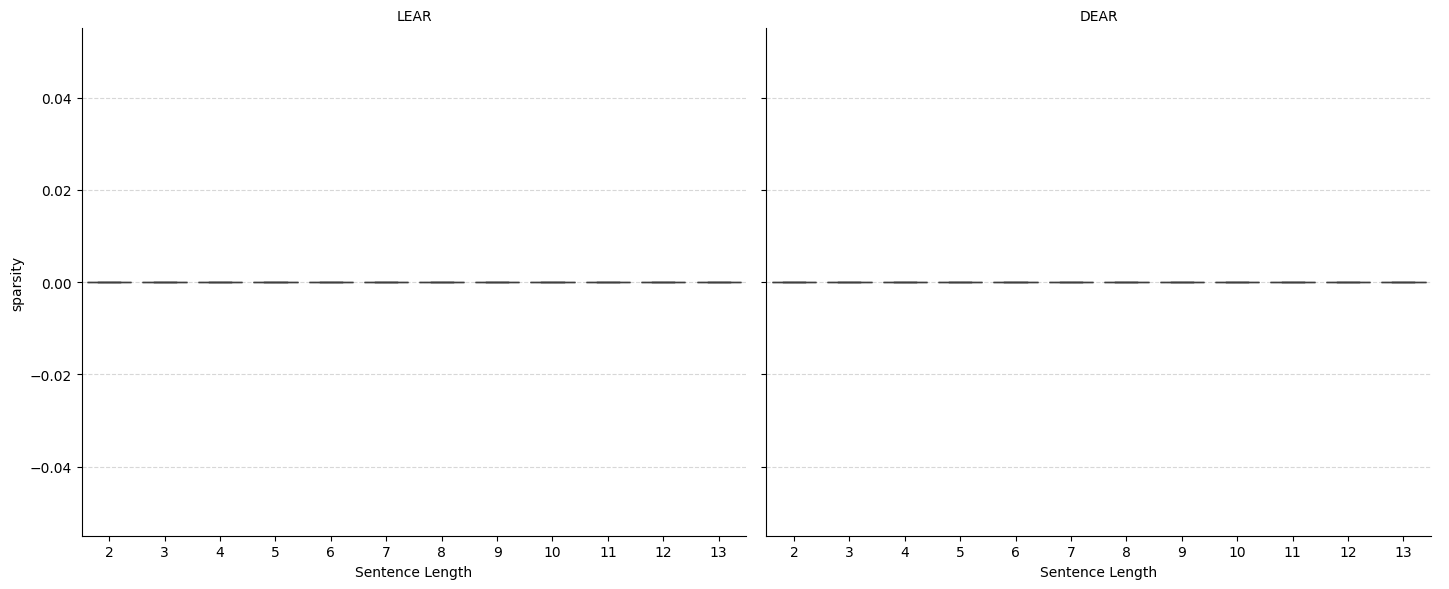

In [102]:
# Create long-form DataFrame
lear_long = lear_avg[['sentence_len', 'sparsity']].copy()
lear_long['method'] = 'LEAR'
dear_long = dear_avg[['sentence_len', 'sparsity']].copy()
dear_long['method'] = 'DEAR'
df = pd.concat([lear_long, dear_long], ignore_index=True)

g = sns.catplot(
    data=df,
    x='sentence_len',
    y='sparsity',
    col='method',
    kind='box',
    showcaps=True,
    showfliers=False,
    height=6,
    aspect=1.2
)


g.set_axis_labels("Sentence Length", "sparsity")
g.set_titles("{col_name}")
for ax in g.axes.flat:
    #ax.set_ylim(0, 0.01)
    # create horizontal line at 1/10
    #ax.axhline(1/10, color='red', linestyle='--', label='1/10')
    #ax.set_yticks([n*0.1 for n in range(11)])
    ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()





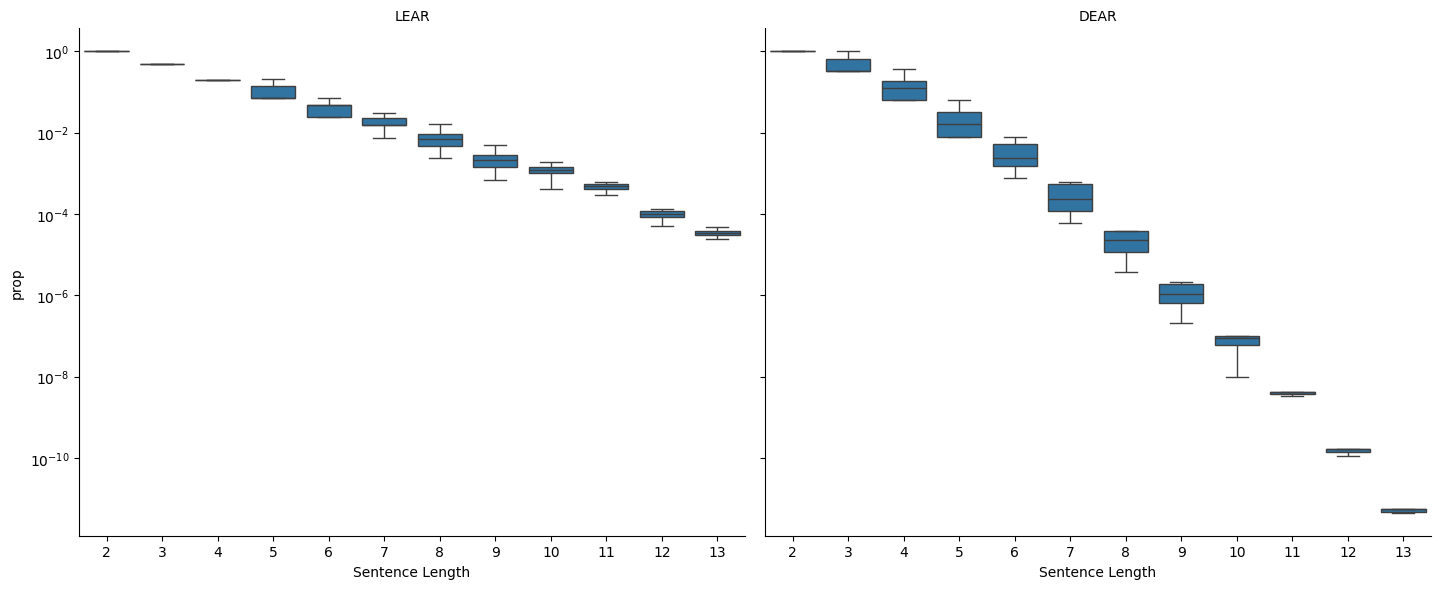

In [103]:
# Create long-form DataFrame
lear_long = lear_avg[['sentence_len', 'prop']].copy()
lear_long['method'] = 'LEAR'
dear_long = dear_avg[['sentence_len', 'prop']].copy()
dear_long['method'] = 'DEAR'
df = pd.concat([lear_long, dear_long], ignore_index=True)

g = sns.catplot(
    data=df,
    x='sentence_len',
    y='prop',
    col='method',
    kind='box',
    showcaps=True,
    showfliers=False,
    height=6,
    aspect=1.2
)

g.set_axis_labels("Sentence Length", "prop")
g.set_titles("{col_name}")
plt.yscale('log')
plt.tight_layout()
plt.show()





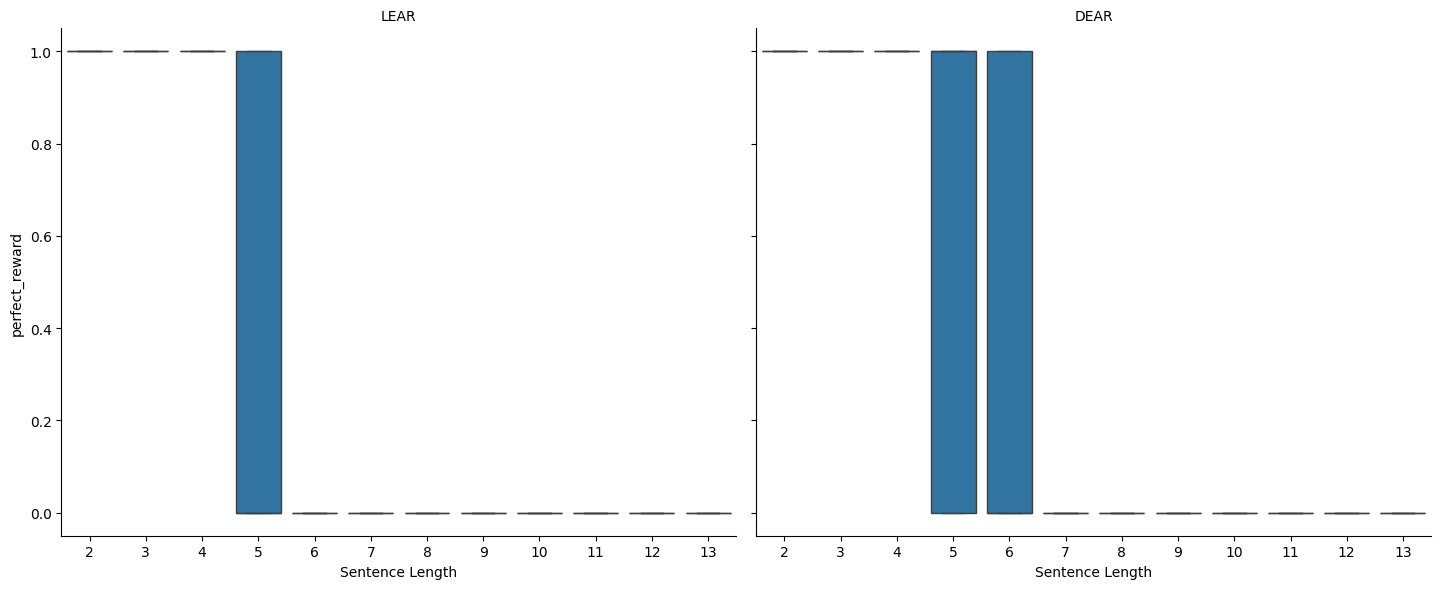

In [175]:
# Create long-form DataFrame
lear_long = lear_avg[['sentence_len', 'perfect_reward']].copy()
lear_long['method'] = 'LEAR'
dear_long = dear_avg[['sentence_len', 'perfect_reward']].copy()
dear_long['method'] = 'DEAR'
df = pd.concat([lear_long, dear_long], ignore_index=True)

g = sns.catplot(
    data=df,
    x='sentence_len',
    y='perfect_reward',
    col='method',
    kind='box',
    showcaps=True,
    showfliers=False,
    height=6,
    aspect=1.2
)

g.set_axis_labels("Sentence Length", "perfect_reward")
g.set_titles("{col_name}")
plt.tight_layout()
plt.show()





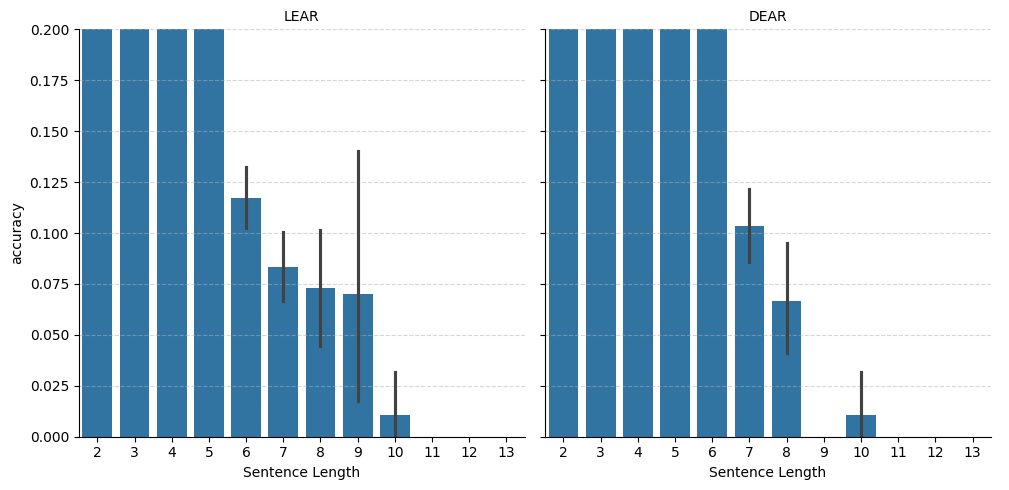

In [223]:
# Create long-form DataFrame
lear_long = lear_avg[['sentence_len', 'accuracy']].copy()
lear_long['method'] = 'LEAR'
dear_long = dear_avg[['sentence_len', 'accuracy']].copy()
dear_long['method'] = 'DEAR'
df = pd.concat([lear_long, dear_long], ignore_index=True)

g = sns.catplot(
    data=df,
    x='sentence_len',
    y='accuracy',
    col='method',
    kind='bar',
)

g.set_axis_labels("Sentence Length", "accuracy")
g.set_titles("{col_name}")
for ax in g.axes.flat:
    ax.set_ylim(0, 0.2)
    ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()





In [104]:
dear_avg[dear_avg['sentence_len'] == 3]

,input,c_reward,c_reward_max,c_reward_min,s_reward,sentence_len,possible_trees,group_idx,row_num,sparsity,trees_explored,diversity,prop
2,a cake was slid by the landlord,0.510000,1.0,0.4,0.50,3,3,2573,2,0.0,7,0.7,1.000000
4,a hamburger was loaned to a baby,0.690000,1.0,0.4,0.15,3,3,6992,4,0.0,8,0.8,1.000000
7,who reddened william ?,0.550000,0.8,0.4,0.05,3,3,31975,7,0.0,8,0.8,1.000000
17,what did benjamin paint ?,0.550000,0.8,0.4,0.25,3,3,30146,17,0.0,8,0.8,1.000000
23,ava preferred to eat,0.605714,0.8,0.4,0.75,3,3,10539,23,0.0,8,0.8,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32562,a chair was lent to liam,1.000000,1.0,1.0,1.00,3,3,3118,32562,0.0,1,0.1,0.333333
32564,the basket was frozen by olivia,1.000000,1.0,1.0,1.00,3,3,20311,32564,0.0,2,0.2,0.666667
32566,emma loved the muffin,1.000000,1.0,1.0,1.00,3,3,13324,32566,0.0,1,0.1,0.333333
32569,a doll was observed by the turkey,1.000000,1.0,1.0,1.00,3,3,4363,32569,0.0,2,0.2,0.666667


In [191]:
dear_df[dear_df['input']=='a cake was slid by the landlord']

,input,sentence_len,gold,output,processed_gold,sample_num,c_reward,s_reward,possible_trees,anon_output,group_idx
20,a cake was slid by the landlord,3,* landlord ( x _ 6 ) ; cake ( x _ 1 ) and slid...,"slide(landlord,theme) slide(cake,agent)","[[slide, cake, theme], [slide, landlord, agent]]",0,1.0,0.0,3,slide(landlord) slide(cake),2573
21,a cake was slid by the landlord,3,* landlord ( x _ 6 ) ; cake ( x _ 1 ) and slid...,"cake(slide,relcl) landlord(cake,in) slide(cake...","[[slide, cake, theme], [slide, landlord, agent]]",1,0.4,1.0,3,cake(slide) landlord(cake) slide(cake),2573
22,a cake was slid by the landlord,3,* landlord ( x _ 6 ) ; cake ( x _ 1 ) and slid...,"cake(slide,relcl) cake(landlord,in) slide(cake...","[[slide, cake, theme], [slide, landlord, agent]]",2,0.4,1.0,3,cake(slide) cake(landlord) slide(cake),2573
23,a cake was slid by the landlord,3,* landlord ( x _ 6 ) ; cake ( x _ 1 ) and slid...,"cake(landlord,beside) slide(cake,theme)","[[slide, cake, theme], [slide, landlord, agent]]",3,0.5,1.0,3,cake(landlord) slide(cake),2573
24,a cake was slid by the landlord,3,* landlord ( x _ 6 ) ; cake ( x _ 1 ) and slid...,"landlord(slide,relcl) landlord(cake,beside) sl...","[[slide, cake, theme], [slide, landlord, agent]]",4,0.4,0.0,3,landlord(slide) landlord(cake) slide(landlord),2573
25,a cake was slid by the landlord,3,* landlord ( x _ 6 ) ; cake ( x _ 1 ) and slid...,"landlord(slide,relcl) cake(landlord,on) slide(...","[[slide, cake, theme], [slide, landlord, agent]]",5,0.4,0.0,3,landlord(slide) cake(landlord) slide(landlord),2573
26,a cake was slid by the landlord,3,* landlord ( x _ 6 ) ; cake ( x _ 1 ) and slid...,"landlord(slide,relcl) cake(landlord,beside) sl...","[[slide, cake, theme], [slide, landlord, agent]]",6,0.4,0.0,3,landlord(slide) cake(landlord) slide(landlord),2573
27,a cake was slid by the landlord,3,* landlord ( x _ 6 ) ; cake ( x _ 1 ) and slid...,"cake(slide,relcl) cake(landlord,in) slide(cake...","[[slide, cake, theme], [slide, landlord, agent]]",7,0.4,1.0,3,cake(slide) cake(landlord) slide(cake),2573
28,a cake was slid by the landlord,3,* landlord ( x _ 6 ) ; cake ( x _ 1 ) and slid...,"cake(slide,relcl) landlord(cake,in) slide(cake...","[[slide, cake, theme], [slide, landlord, agent]]",8,0.4,1.0,3,cake(slide) landlord(cake) slide(cake),2573
29,a cake was slid by the landlord,3,* landlord ( x _ 6 ) ; cake ( x _ 1 ) and slid...,"slide(landlord,theme) cake(slide,relcl) slide(...","[[slide, cake, theme], [slide, landlord, agent]]",9,0.8,0.0,3,slide(landlord) cake(slide) slide(cake),2573


In [187]:
dear_avg_beginning = dear_avg.head(1000)
lear_avg_beginning = lear_avg.head(1000)

print(f"DeAR c_reward Mean: {dear_avg_beginning['c_reward'].mean()}")
print(f'DeAR Sparsity Mean: {dear_avg_beginning['sparsity'].mean()}')
print(f"DeAR Sparsity std: {dear_avg_beginning['sparsity'].std()}")
print(f'DeAR Diversity Mean: {dear_avg_beginning['diversity'].mean()}')
print(f'DeAR Diversity std: {dear_avg_beginning['diversity'].std()}')
print(f'DeAR Diversity Prop Mean: {dear_avg_beginning['prop'].mean()}')
print(f'DeAR Diversity Prop std: {dear_avg_beginning['prop'].std()}')
print(f'DeAR Diversity Prop Max: {dear_avg_beginning['prop'].max()}')
print(f'DeAR Diversity Prop Min: {dear_avg_beginning['prop'].min()}')
print('')
print(f"LEAR c_reward Mean: {lear_avg_beginning['c_reward'].mean()}")
print(f'LEAR Sparsity Mean: {lear_avg_beginning['sparsity'].mean()}')
print(f"LEAR Sparsity std: {lear_avg_beginning['sparsity'].std()}")
print(f'LEAR Diversity Mean: {lear_avg_beginning['diversity'].mean()}')
print(f'LEAR Diversity std: {lear_avg_beginning['diversity'].std()}')
print(f'LEAR Diversity Prop Mean: {lear_avg_beginning['prop'].mean()}')
print(f'LEAR Diversity Prop std: {lear_avg_beginning['prop'].std()}')
print(f'LEAR Diversity Prop Max: {lear_avg_beginning['prop'].max()}')
print(f'LEAR Diversity Prop Min: {lear_avg_beginning['prop'].min()}')


DeAR c_reward Mean: 0.5061289446126015
DeAR Sparsity Mean: 0.0368
DeAR Sparsity std: 0.07830639751573235
DeAR Diversity Mean: 0.814
DeAR Diversity std: 0.26342625798009084
DeAR Diversity Prop Mean: 1.3592134879226327
DeAR Diversity Prop std: 1.1292190533459185
DeAR Diversity Prop Max: 3.3333333333333335
DeAR Diversity Prop Min: 4.24097618372485e-09

LEAR c_reward Mean: 0.8590121601866224
LEAR Sparsity Mean: 0.003
LEAR Sparsity std: 0.054717401199198004
LEAR Diversity Mean: 0.18000000000000002
LEAR Diversity std: 0.14745081126172802
LEAR Diversity Prop Mean: 0.4211890050609865
LEAR Diversity Prop std: 0.28233699118394706
LEAR Diversity Prop Max: 1.0
LEAR Diversity Prop Min: 0.0004763038818766373


In [188]:
dear_avg_ending = dear_avg.tail(1000)
lear_avg_ending = lear_avg.tail(1000)

print(f"DeAR c_reward Mean: {dear_avg_ending['c_reward'].mean()}")
print(f'DeAR Sparsity Mean: {dear_avg_ending['sparsity'].mean()}')
print(f"DeAR Sparsity std: {dear_avg_ending['sparsity'].std()}")
print(f'DeAR Diversity Mean: {dear_avg_ending['diversity'].mean()}')
print(f'DeAR Diversity std: {dear_avg_ending['diversity'].std()}')
print(f'DeAR Diversity Prop Mean: {dear_avg_ending['prop'].mean()}')
print(f'DeAR Diversity Prop std: {dear_avg_ending['prop'].std()}')
print(f'DeAR Diversity Prop Max: {dear_avg_ending['prop'].max()}')
print(f'DeAR Diversity Prop Min: {dear_avg_ending['prop'].min()}')
print('')
print(f"LEAR c_reward Mean: {lear_avg_ending['c_reward'].mean()}")
print(f'LEAR Sparsity Mean: {lear_avg_ending['sparsity'].mean()}')
print(f"LEAR Sparsity std: {lear_avg_ending['sparsity'].std()}")
print(f'LEAR Diversity Mean: {lear_avg_ending['diversity'].mean()}')
print(f'LEAR Diversity std: {lear_avg_ending['diversity'].std()}')
print(f'LEAR Diversity Prop Mean: {lear_avg_ending['prop'].mean()}')
print(f'LEAR Diversity Prop std: {lear_avg_ending['prop'].std()}')
print(f'LEAR Diversity Prop Max: {lear_avg_ending['prop'].max()}')
print(f'LEAR Diversity Prop Min: {lear_avg_ending['prop'].min()}')


DeAR c_reward Mean: 0.9948053356393063
DeAR Sparsity Mean: 0.0
DeAR Sparsity std: 0.0
DeAR Diversity Mean: 0.1393
DeAR Diversity std: 0.07610059987477959
DeAR Diversity Prop Mean: 0.30043710259597983
DeAR Diversity Prop std: 0.3280278624422592
DeAR Diversity Prop Max: 2.0
DeAR Diversity Prop Min: 1.615055828898457e-10

LEAR c_reward Mean: 0.9317213894318243
LEAR Sparsity Mean: 0.0
LEAR Sparsity std: 0.0
LEAR Diversity Mean: 0.11420000000000002
LEAR Diversity std: 0.05866687141651412
LEAR Diversity Prop Mean: 0.368935230816655
LEAR Diversity Prop std: 0.287454129997443
LEAR Diversity Prop Max: 1.0
LEAR Diversity Prop Min: 0.00013608682339332493


In [204]:
# Bin the data into groups of 10 rows by row_num and average c_reward, c_reward_min, c_reward_max
bin_size = 500
dear_avg['bin'] = dear_avg['row_num'] // bin_size
lear_avg['bin'] = lear_avg['row_num'] // bin_size

dear_binned = dear_avg.groupby('bin').agg({
    'c_reward': 'mean',
    'c_reward_min': 'mean',
    'c_reward_max': 'mean',
    's_reward': 'mean',
    'sparsity': 'mean',
    'diversity': 'mean',
    'prop': 'mean',
    'perfect_reward': 'mean',
    'accuracy': 'mean'
}).reset_index()

lear_binned = lear_avg.groupby('bin').agg({
    'c_reward': 'mean',
    'c_reward_min': 'mean',
    'c_reward_max': 'mean',
    's_reward': 'mean',
    'sparsity': 'mean',
    'diversity': 'mean',
    'prop': 'mean',
    'perfect_reward': 'mean',
    'accuracy': 'mean'
}).reset_index()

lear_binned


,bin,c_reward,c_reward_min,c_reward_max,s_reward,sparsity,diversity,prop,perfect_reward,accuracy
0,0,0.866873,0.799213,0.916703,0.607006,0.002,0.193200,0.444575,0.504000,0.052000
1,1,0.851151,0.806094,0.889047,0.797648,0.004,0.166800,0.397803,0.510000,0.218000
2,2,0.875761,0.840768,0.903201,0.822113,0.006,0.137400,0.413875,0.554000,0.288000
3,3,0.881114,0.835111,0.918035,0.863574,0.002,0.158000,0.391060,0.542000,0.324000
4,4,0.884737,0.842989,0.909994,0.891893,0.002,0.146800,0.413220,0.564000,0.390000
...,...,...,...,...,...,...,...,...,...,...
61,61,0.922760,0.909514,0.928284,0.938185,0.004,0.120400,0.382491,0.738000,0.550000
62,62,0.910539,0.892829,0.915348,0.928420,0.004,0.119600,0.358688,0.698000,0.522000
63,63,0.935756,0.916433,0.941346,0.953262,0.000,0.116600,0.370939,0.750000,0.568000
64,64,0.929001,0.912564,0.934022,0.948756,0.000,0.112800,0.370948,0.726000,0.558000


In [205]:
dear_binned

,bin,c_reward,c_reward_min,c_reward_max,s_reward,sparsity,diversity,prop,perfect_reward,accuracy
0,0,0.511166,0.302780,0.805249,0.359760,0.0322,0.811400,1.406890,0.000000,0.000000
1,1,0.501092,0.284707,0.792250,0.397410,0.0414,0.816600,1.311537,0.000000,0.000000
2,2,0.647312,0.410475,0.876898,0.433687,0.0174,0.715600,1.189785,0.044000,0.002000
3,3,0.775607,0.643686,0.853214,0.511857,0.0020,0.536200,0.632227,0.350000,0.012000
4,4,0.810363,0.736783,0.858137,0.629333,0.0000,0.458600,0.562610,0.468000,0.074000
...,...,...,...,...,...,...,...,...,...,...
61,61,0.985683,0.970251,0.995139,0.981183,0.0000,0.151200,0.318646,0.914000,0.836000
62,62,0.989655,0.978125,0.995072,0.971609,0.0000,0.140800,0.289461,0.940000,0.824000
63,63,0.995682,0.986338,0.998933,0.980761,0.0000,0.138400,0.303094,0.956000,0.848000
64,64,0.994793,0.981646,0.999132,0.979946,0.0000,0.140400,0.305231,0.938000,0.848000


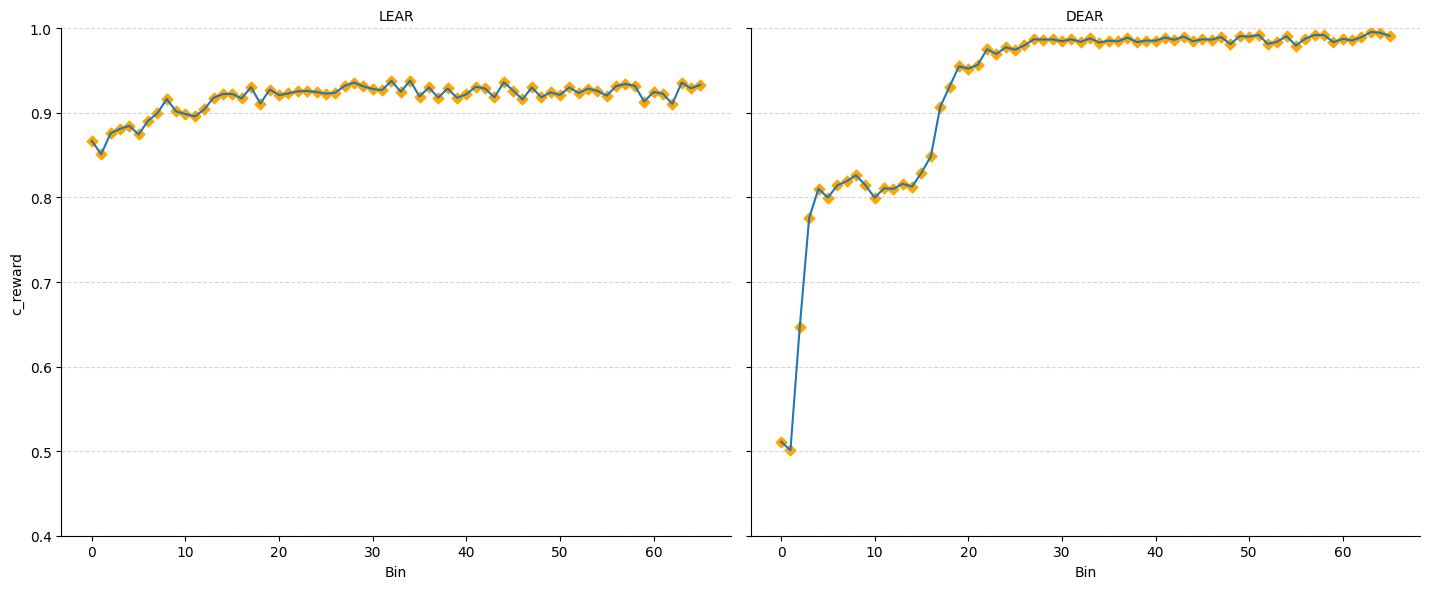

In [206]:
# Create long-form DataFrame
lear_long = lear_binned[['bin', 'c_reward']].copy()
lear_long['method'] = 'LEAR'
dear_long = dear_binned[['bin', 'c_reward']].copy()
dear_long['method'] = 'DEAR'
df = pd.concat([lear_long, dear_long], ignore_index=True)

g = sns.relplot(
    data=df,
    x='bin',
    y='c_reward',
    col='method',
    kind='line',
    height=6,
    aspect=1.2
)

g.set_axis_labels("Bin", "c_reward")
g.set_titles("{col_name}")
for ax, method in zip(g.axes.flat, df['method'].unique()):
    # Add orange diamond markers to each datapoint
    subset = df[df['method'] == method]
    ax.scatter(subset['bin'], subset['c_reward'], marker='D', color='orange', s=30, label='Data point')
    ax.set_ylim(0.4, 1)
    ax.set_yticks([n*0.1 for n in range(4, 11)])
    ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

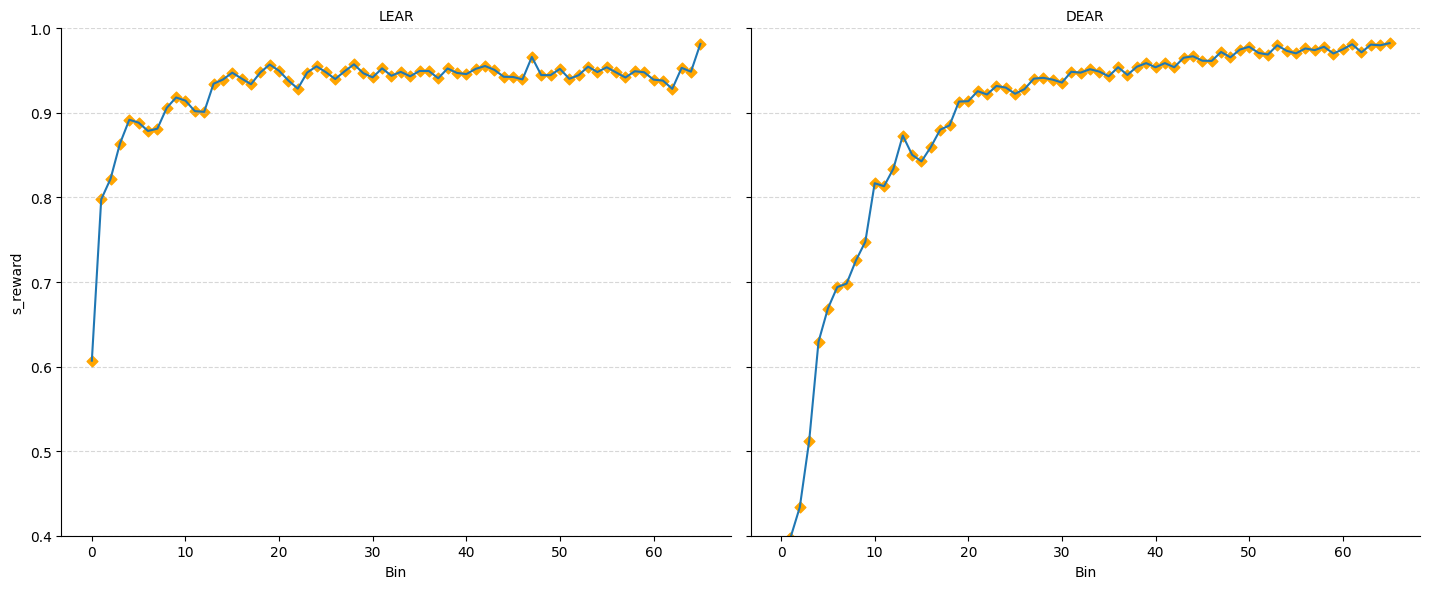

In [280]:
# Create long-form DataFrame
lear_long = lear_binned[['bin', 's_reward']].copy()
lear_long['method'] = 'LEAR'
dear_long = dear_binned[['bin', 's_reward']].copy()
dear_long['method'] = 'DEAR'
df = pd.concat([lear_long, dear_long], ignore_index=True)

g = sns.relplot(
    data=df,
    x='bin',
    y='s_reward',
    col='method',
    kind='line',
    height=6,
    aspect=1.2
)

g.set_axis_labels("Bin", "s_reward")
g.set_titles("{col_name}")
for ax, method in zip(g.axes.flat, df['method'].unique()):
    # Add orange diamond markers to each datapoint
    subset = df[df['method'] == method]
    ax.scatter(subset['bin'], subset['s_reward'], marker='D', color='orange', s=30, label='Data point')
    ax.set_ylim(0.4, 1)
    ax.set_yticks([n*0.1 for n in range(4, 11)])
    ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

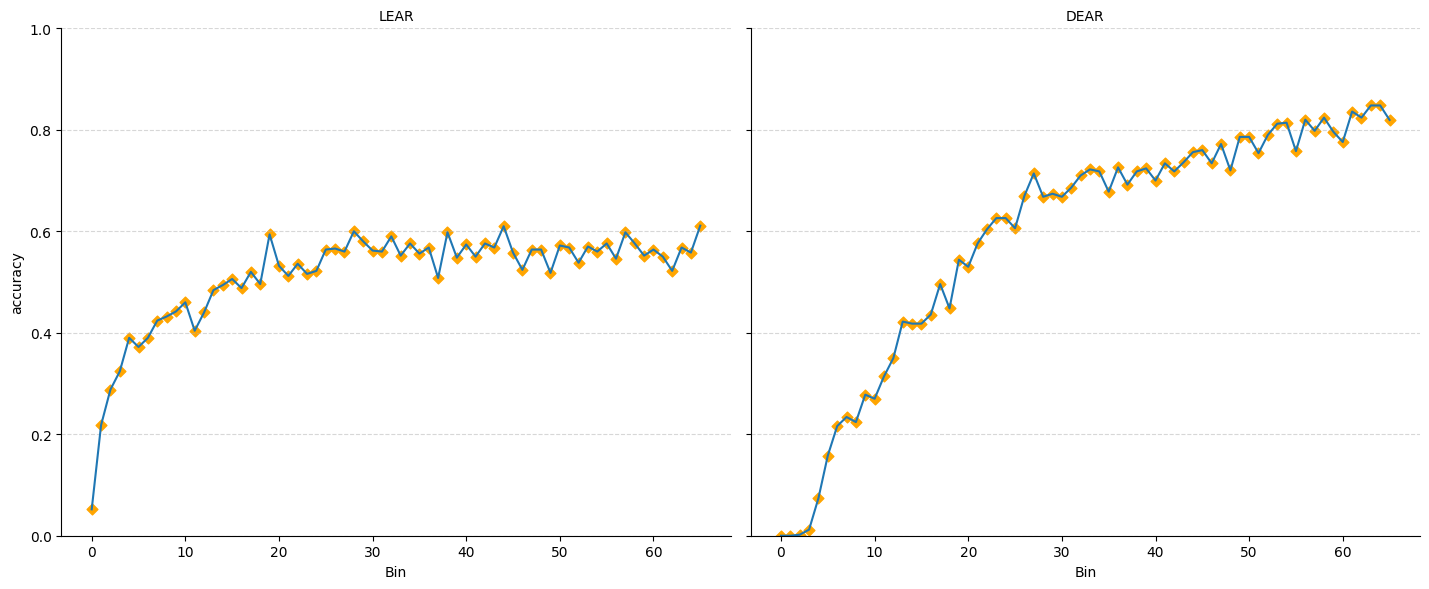

In [215]:
# Create long-form DataFrame
lear_long = lear_binned[['bin', 'accuracy']].copy()
lear_long['method'] = 'LEAR'
dear_long = dear_binned[['bin', 'accuracy']].copy()
dear_long['method'] = 'DEAR'
df = pd.concat([lear_long, dear_long], ignore_index=True)

g = sns.relplot(
    data=df,
    x='bin',
    y='accuracy',
    col='method',
    kind='line',
    height=6,
    aspect=1.2
)

g.set_axis_labels("Bin", "accuracy")
g.set_titles("{col_name}")
for ax, method in zip(g.axes.flat, df['method'].unique()):
    # Add orange diamond markers to each datapoint
    subset = df[df['method'] == method]
    ax.scatter(subset['bin'], subset['accuracy'], marker='D', color='orange', s=30, label='Data point')
    ax.set_ylim(0, 1)
    #ax.set_yticks([n*0.1 for n in range(4, 11)])
    ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

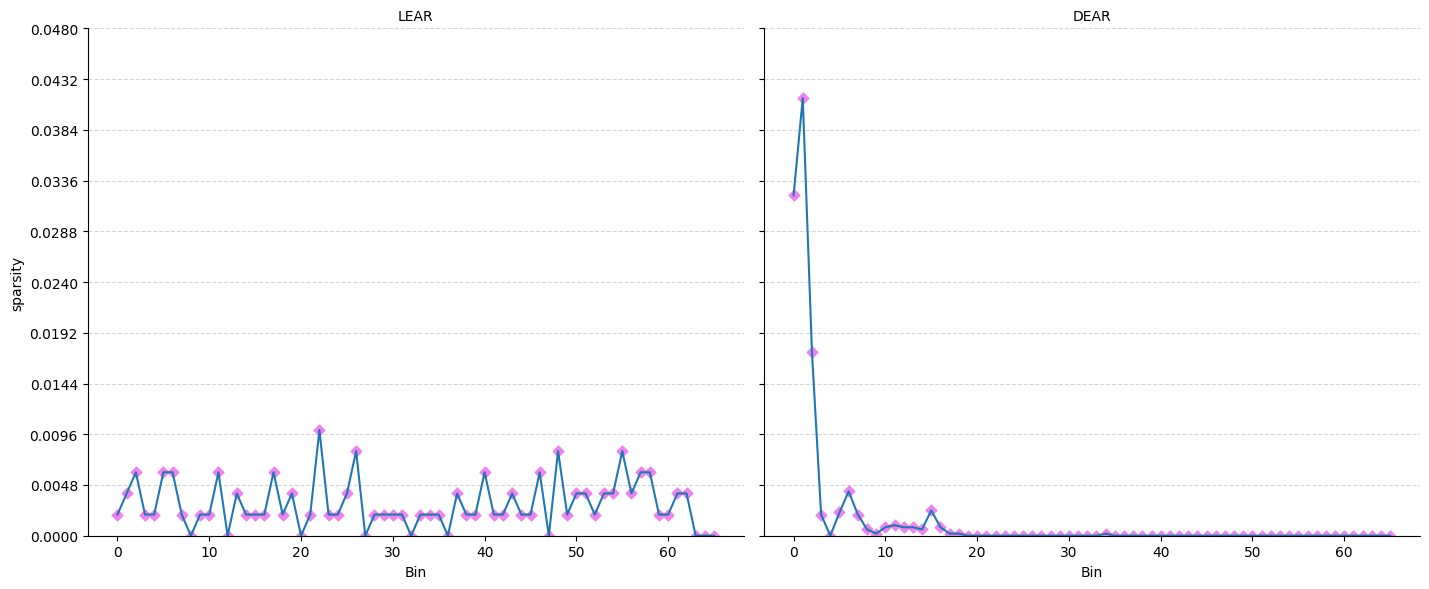

In [304]:
# Create long-form DataFrame
lear_long = lear_binned[['bin', 'sparsity']].copy()
lear_long['method'] = 'LEAR'
dear_long = dear_binned[['bin', 'sparsity']].copy()
dear_long['method'] = 'DEAR'
df = pd.concat([lear_long, dear_long], ignore_index=True)

g = sns.relplot(
    data=df,
    x='bin',
    y='sparsity',
    col='method',
    kind='line',
    height=6,
    aspect=1.2
)

g.set_axis_labels("Bin", "sparsity")
g.set_titles("{col_name}")
for ax, method in zip(g.axes.flat, df['method'].unique()):
    # Add orange diamond markers to each datapoint
    subset = df[df['method'] == method]
    ax.scatter(subset['bin'], subset['sparsity'], marker='D', color='violet', s=30, label='Data point')
    ax.set_ylim(0, 0.048)
    ax.set_yticks([n*0.0048 for n in range(11)])
    ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

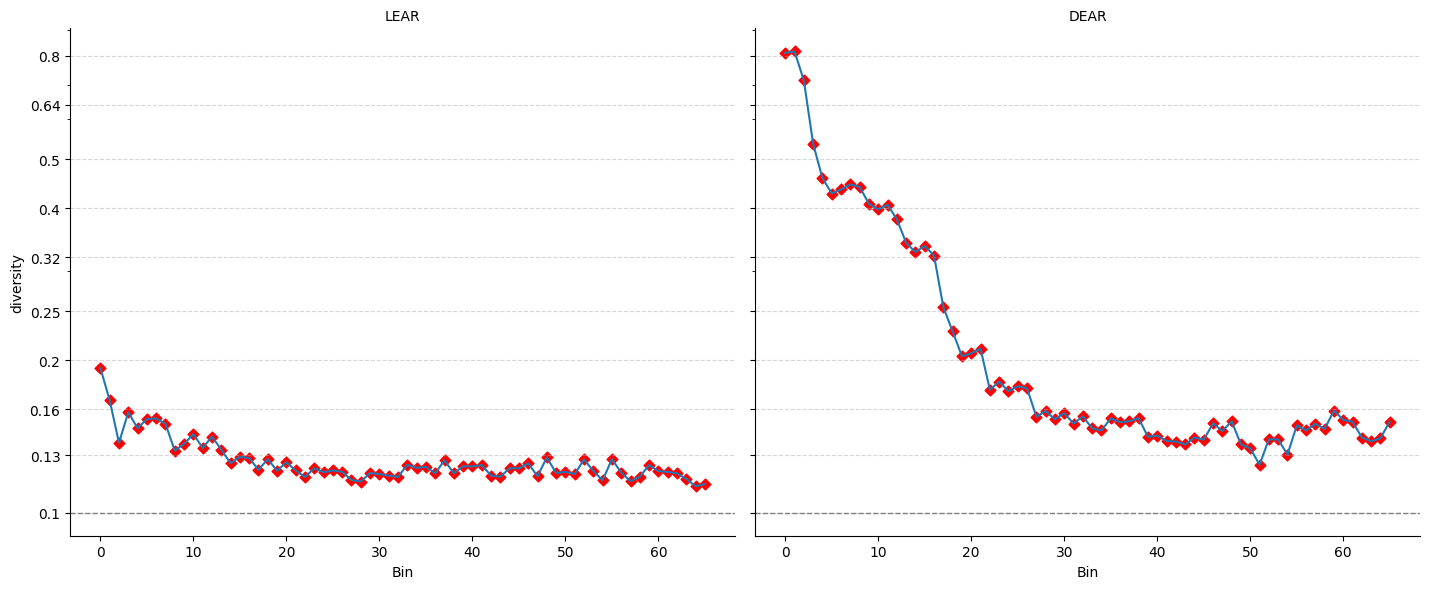

In [259]:
# Create long-form DataFrame
lear_long = lear_binned[['bin', 'diversity']].copy()
lear_long['method'] = 'LEAR'
dear_long = dear_binned[['bin', 'diversity']].copy()
dear_long['method'] = 'DEAR'
df = pd.concat([lear_long, dear_long], ignore_index=True)

g = sns.relplot(
    data=df,
    x='bin',
    y='diversity',
    col='method',
    kind='line',
    height=6,
    aspect=1.2
)


g.set_axis_labels("Bin", "diversity")
g.set_titles("{col_name}")
for ax, method in zip(g.axes.flat, df['method'].unique()):
    # Add orange diamond markers to each datapoint
    subset = df[df['method'] == method]
    ax.axhline(1/10, color='gray', linestyle='--', linewidth=1, label='1/10')
    ax.scatter(subset['bin'], subset['diversity'], marker='D', color='red', s=30, label='Data point')
    #ax.set_ylim(0.1, 0.2)
    #ax.set_yticks([n*0.1 for n in range(10)])
    ax.set_yscale('log')
    yticks = [round(0.1 * 1.26**n,2) for n in range(10)]
    ax.set_yticks(yticks)
    ax.set_yticklabels([str(ytick) for ytick in yticks])
    ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [ ]:
#[0.1, 0.2, 0.4, 0.8]

[round(0.1 * 1.35**n,2) for n in range(8)]

[0.1, 0.13, 0.18, 0.24, 0.32, 0.43, 0.58, 0.78]

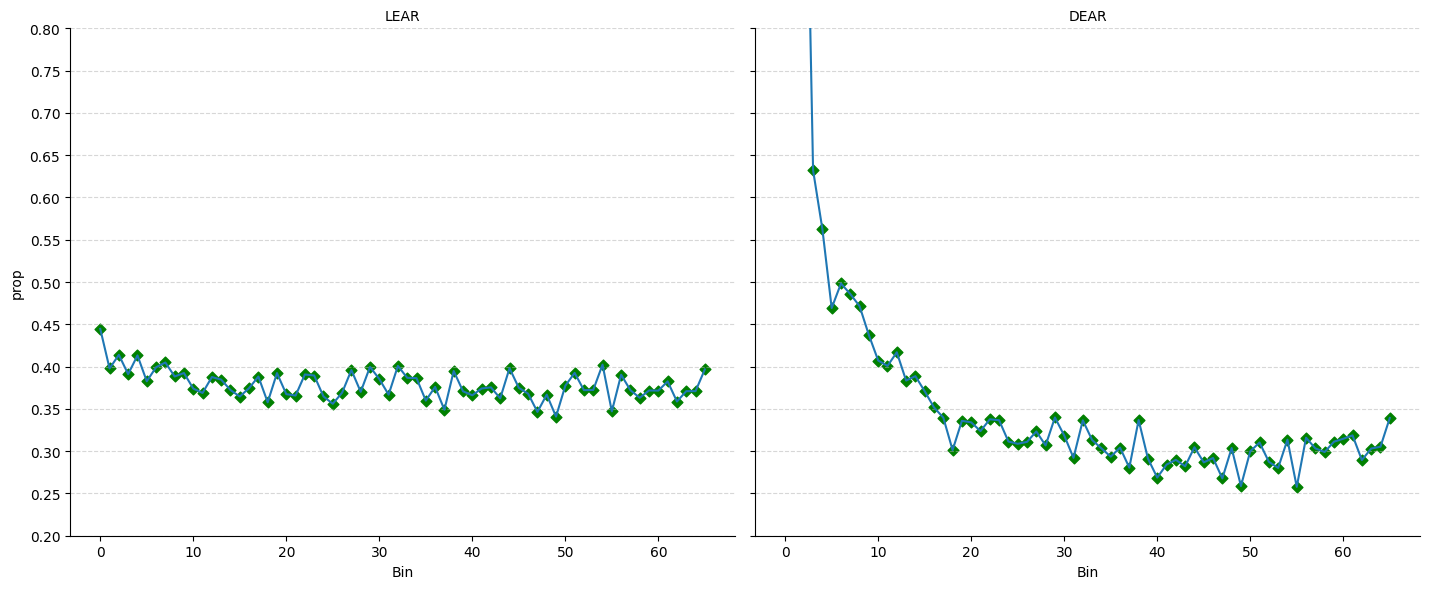

In [211]:
# Create long-form DataFrame
lear_long = lear_binned[['bin', 'prop']].copy()
lear_long['method'] = 'LEAR'
dear_long = dear_binned[['bin', 'prop']].copy()
dear_long['method'] = 'DEAR'
df = pd.concat([lear_long, dear_long], ignore_index=True)

g = sns.relplot(
    data=df,
    x='bin',
    y='prop',
    col='method',
    kind='line',
    height=6,
    aspect=1.2
)

g.set_axis_labels("Bin", "prop")
g.set_titles("{col_name}")
for ax, method in zip(g.axes.flat, df['method'].unique()):
    # Add orange diamond markers to each datapoint
    subset = df[df['method'] == method]
    ax.scatter(subset['bin'], subset['prop'], marker='D', color='green', s=30, label='Data point')
    ax.set_ylim(0.2, 0.8)
    ax.set_yticks([n*0.05 for n in range(4,17)])
    ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

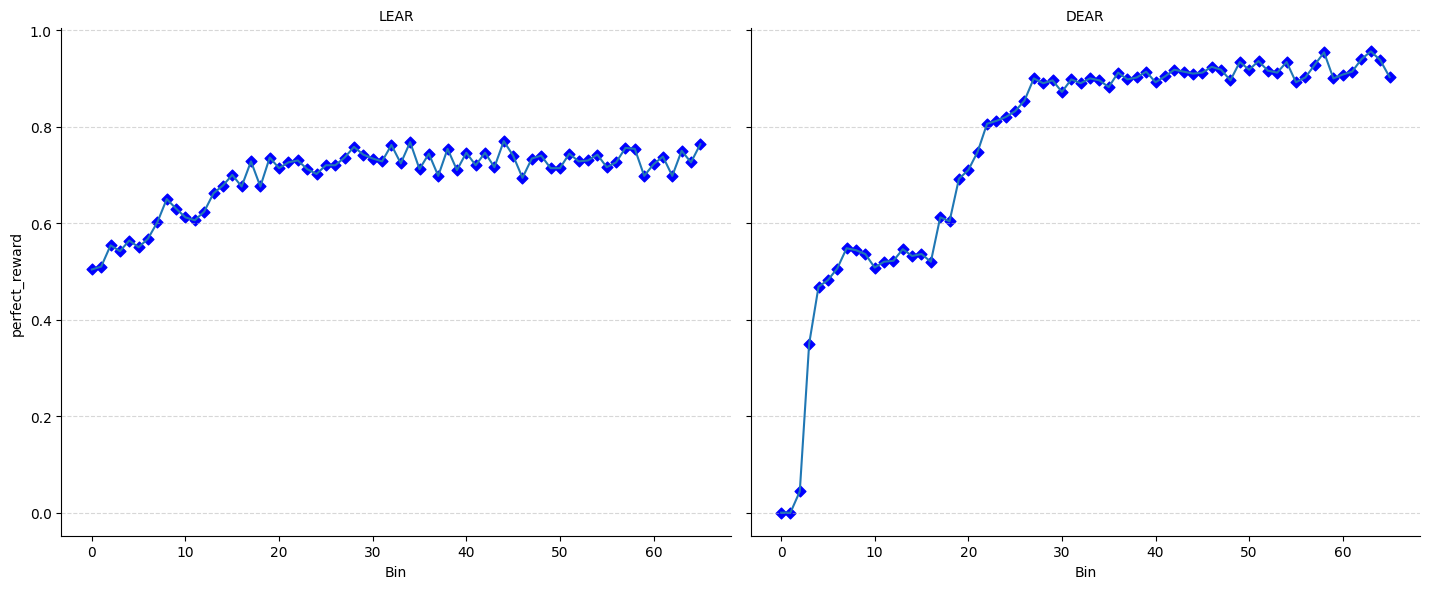

In [212]:
# Create long-form DataFrame
lear_long = lear_binned[['bin', 'perfect_reward']].copy()
lear_long['method'] = 'LEAR'
dear_long = dear_binned[['bin', 'perfect_reward']].copy()
dear_long['method'] = 'DEAR'
df = pd.concat([lear_long, dear_long], ignore_index=True)

g = sns.relplot(
    data=df,
    x='bin',
    y='perfect_reward',
    col='method',
    kind='line',
    height=6,
    aspect=1.2
)

g.set_axis_labels("Bin", "perfect_reward")
g.set_titles("{col_name}")
for ax, method in zip(g.axes.flat, df['method'].unique()):
    # Add orange diamond markers to each datapoint
    subset = df[df['method'] == method]
    ax.scatter(subset['bin'], subset['perfect_reward'], marker='D', color='blue', s=30, label='Data point')
    #ax.set_ylim(0.2, 0.8)
    #ax.set_yticks([n*0.05 for n in range(4,17)])
    ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [213]:
dear_avg[['sentence_len', 'possible_trees', 'sparsity', 'trees_explored', 'diversity', 'prop']]

,sentence_len,possible_trees,sparsity,trees_explored,diversity,prop
0,4,16,0.2,10,1.0,0.625000
1,5,125,0.0,10,1.0,0.080000
2,3,3,0.0,7,0.7,2.333333
3,8,262144,0.4,10,1.0,0.000038
4,3,3,0.0,8,0.8,2.666667
...,...,...,...,...,...,...
32567,4,16,0.0,2,0.2,0.125000
32568,7,16807,0.0,4,0.4,0.000238
32569,3,3,0.0,2,0.2,0.666667
32570,3,3,0.0,2,0.2,0.666667


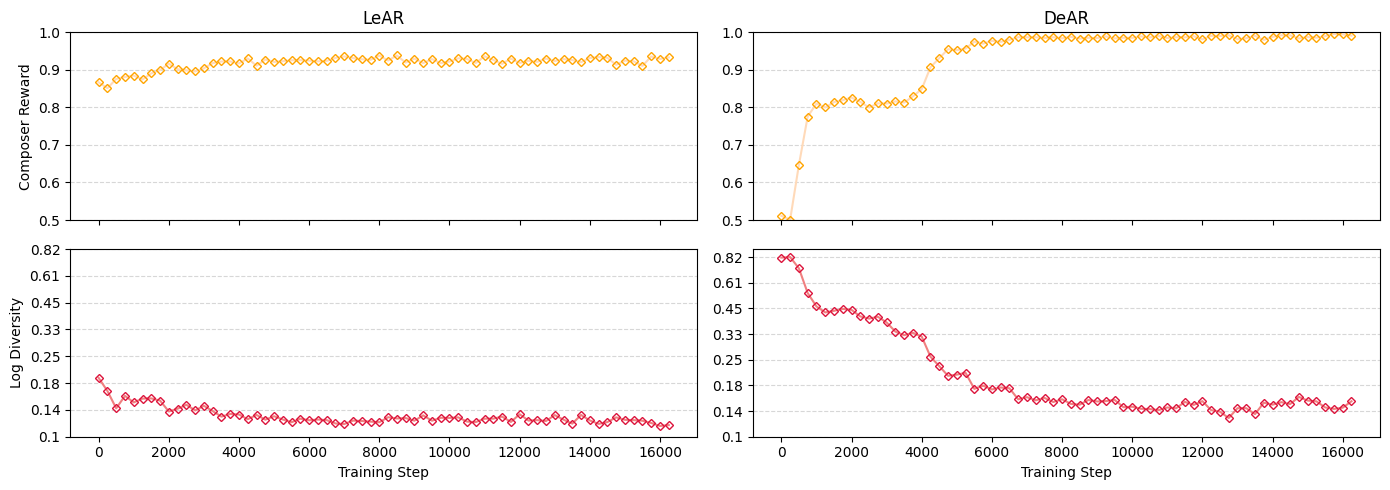

In [305]:
# Overlay diversity on the c_reward plot for each method

# Prepare diversity data in long form
lear_c_df = lear_binned[['bin', 'c_reward']].copy()
lear_c_df['method'] = 'LEAR'
dear_c_df = dear_binned[['bin', 'c_reward']].copy()
dear_c_df['method'] = 'DEAR'
c_df = pd.concat([lear_c_df, dear_c_df], ignore_index=True)

lear_div = lear_binned[['bin', 'diversity']].copy()
lear_div['method'] = 'LEAR'
dear_div = dear_binned[['bin', 'diversity']].copy()
dear_div['method'] = 'DEAR'
div_df = pd.concat([lear_div, dear_div], ignore_index=True)

c_df['bin'] = c_df['bin'] * 250
div_df['bin'] = div_df['bin'] * 250


# 2x2 grid: LEAR left, DEAR right; top: c_reward, bottom: diversity

fig, axes = plt.subplots(2, 2, figsize=(14, 5), sharex=True)

# LEAR c_reward
lear_c = c_df[c_df['method'] == 'LEAR']
axes[0, 0].plot(lear_c['bin'], lear_c['c_reward'], markeredgecolor='orange', markerfacecolor='none', marker='D', markersize=4, color='peachpuff')
axes[0, 0].set_title('LeAR')
axes[0, 0].set_ylabel('Composer Reward')
axes[0, 0].set_ylim(0.5, 1)
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.5)

# DEAR c_reward
dear_c = c_df[c_df['method'] == 'DEAR']
axes[0, 1].plot(dear_c['bin'], dear_c['c_reward'], markeredgecolor='orange', markerfacecolor='none', marker='D', markersize=4, color='peachpuff')
axes[0, 1].set_title('DeAR')
axes[0, 1].set_ylim(0.5, 1)
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.5)


div_yticks = [round(0.1 * 1.35**n,4) for n in range(8)]
# LEAR diversity
lear_d = div_df[div_df['method'] == 'LEAR']
axes[1, 0].plot(lear_d['bin'], lear_d['diversity'], markeredgecolor='crimson', markerfacecolor='none', marker='D', markersize=4, color='lightcoral')
axes[1, 0].set_xlabel('Training Step')
axes[1, 0].set_ylabel('Log Diversity')
axes[1, 0].set_yscale('log')
axes[1, 0].set_yticks(div_yticks)
axes[1, 0].set_yticklabels([str(round(ytick,2)) for ytick in div_yticks])
axes[1, 0].minorticks_off()
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.5)

# DEAR diversity
dear_d = div_df[div_df['method'] == 'DEAR']
axes[1, 1].plot(dear_d['bin'], dear_d['diversity'], markeredgecolor='crimson', markerfacecolor='none', marker='D', markersize=4, color='lightcoral')
axes[1, 1].set_xlabel('Training Step')
axes[1, 1].set_yscale('log')
axes[1, 1].set_yticks(div_yticks)
axes[1, 1].set_yticklabels([str(round(ytick,2)) for ytick in div_yticks])
axes[1, 1].minorticks_off()
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

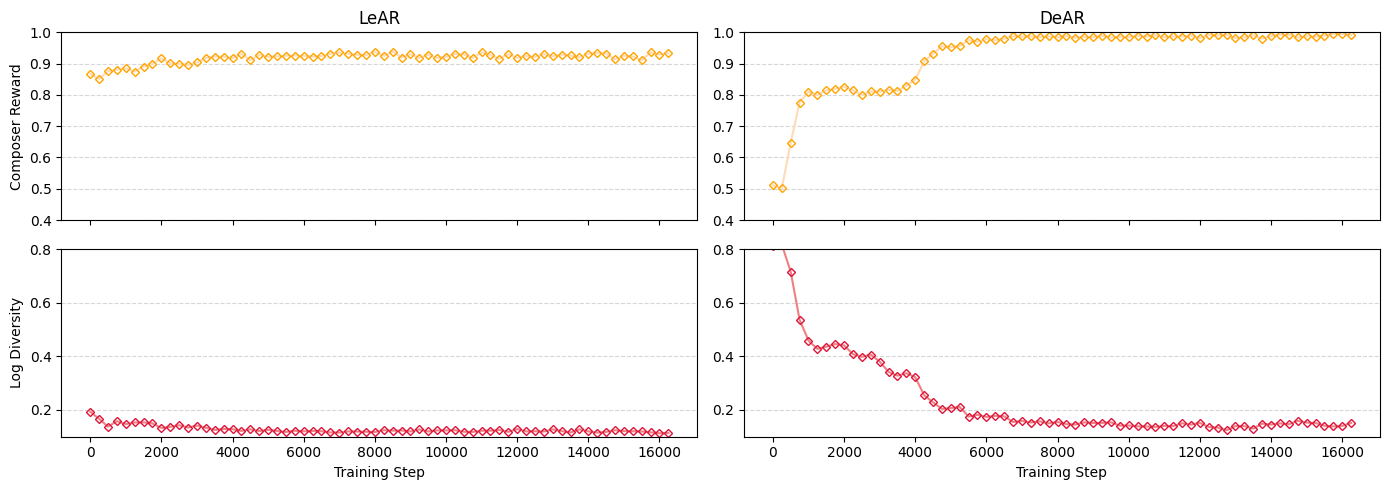

In [287]:
# Overlay diversity on the c_reward plot for each method

# Prepare diversity data in long form
lear_c_df = lear_binned[['bin', 'c_reward']].copy()
lear_c_df['method'] = 'LEAR'
dear_c_df = dear_binned[['bin', 'c_reward']].copy()
dear_c_df['method'] = 'DEAR'
c_df = pd.concat([lear_c_df, dear_c_df], ignore_index=True)

lear_div = lear_binned[['bin', 'diversity']].copy()
lear_div['method'] = 'LEAR'
dear_div = dear_binned[['bin', 'diversity']].copy()
dear_div['method'] = 'DEAR'
div_df = pd.concat([lear_div, dear_div], ignore_index=True)

c_df['bin'] = c_df['bin'] * 250
div_df['bin'] = div_df['bin'] * 250


# 2x2 grid: LEAR left, DEAR right; top: c_reward, bottom: diversity

fig, axes = plt.subplots(2, 2, figsize=(14, 5), sharex=True)

# LEAR c_reward
lear_c = c_df[c_df['method'] == 'LEAR']
axes[0, 0].plot(lear_c['bin'], lear_c['c_reward'], markeredgecolor='orange', markerfacecolor='none', marker='D', markersize=4, color='peachpuff')
axes[0, 0].set_title('LeAR')
axes[0, 0].set_ylabel('Composer Reward')
axes[0, 0].set_ylim(0.4, 1)
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.5)

# DEAR c_reward
dear_c = c_df[c_df['method'] == 'DEAR']
axes[0, 1].plot(dear_c['bin'], dear_c['c_reward'], markeredgecolor='orange', markerfacecolor='none', marker='D', markersize=4, color='peachpuff')
axes[0, 1].set_title('DeAR')
axes[0, 1].set_ylim(0.4, 1)
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.5)


div_yticks = [round(0.1 * 1.35**n,4) for n in range(8)]
# LEAR diversity
lear_d = div_df[div_df['method'] == 'LEAR']
axes[1, 0].plot(lear_d['bin'], lear_d['diversity'], markeredgecolor='crimson', markerfacecolor='none', marker='D', markersize=4, color='lightcoral')
axes[1, 0].set_xlabel('Training Step')
axes[1, 0].set_ylabel('Log Diversity')
#axes[1, 0].set_yscale('log')
#axes[1, 0].set_yticks(div_yticks)
#axes[1, 0].set_yticklabels([str(round(ytick,2)) for ytick in div_yticks])
#axes[1, 0].minorticks_off()
axes[1,0].set_ylim(0.1, 0.8)
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.5)

# DEAR diversity
dear_d = div_df[div_df['method'] == 'DEAR']
axes[1, 1].plot(dear_d['bin'], dear_d['diversity'], markeredgecolor='crimson', markerfacecolor='none', marker='D', markersize=4, color='lightcoral')
axes[1, 1].set_xlabel('Training Step')
#axes[1, 1].set_yscale('log')
#axes[1, 1].set_yticks(div_yticks)
#axes[1, 1].set_yticklabels([str(round(ytick,2)) for ytick in div_yticks])
#axes[1, 1].minorticks_off()
axes[1,1].set_ylim(0.1, 0.8)
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()